
Hierarchical Index DataFrame:
                  OrderID  Sales
Product Month                   
A       January         1    250
B       February        2    300
A       February        3    200
C       March           4    400
A       March           5    150

Sales for Product A across months:
          OrderID  Sales
Month                   
January         1    250
February        3    200
March           5    150

Inner Merge (only shared OrderIDs):
   OrderID Product   Month_x  Sales  CustomerID   Month_y  Feedback_Score
0        1       A   January    250         101   January             4.5
1        2       B  February    300         102  February             4.0

Left Merge (all Sales, feedback when available):
   OrderID Product   Month_x  Sales  CustomerID   Month_y  Feedback_Score
0        1       A   January    250       101.0   January             4.5
1        2       B  February    300       102.0  February             4.0
2        3       A  February    200         Na

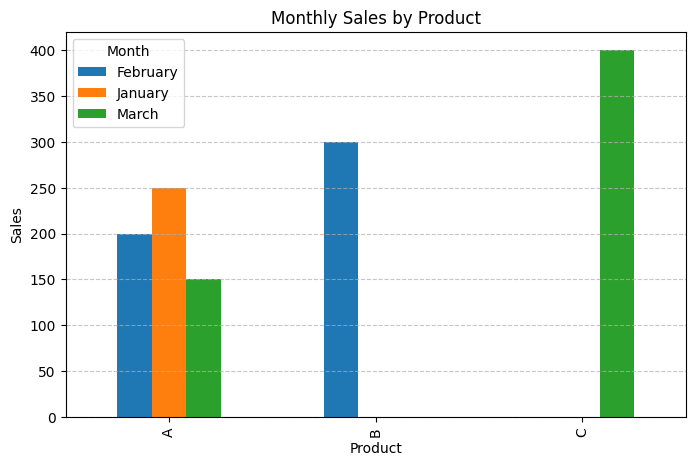

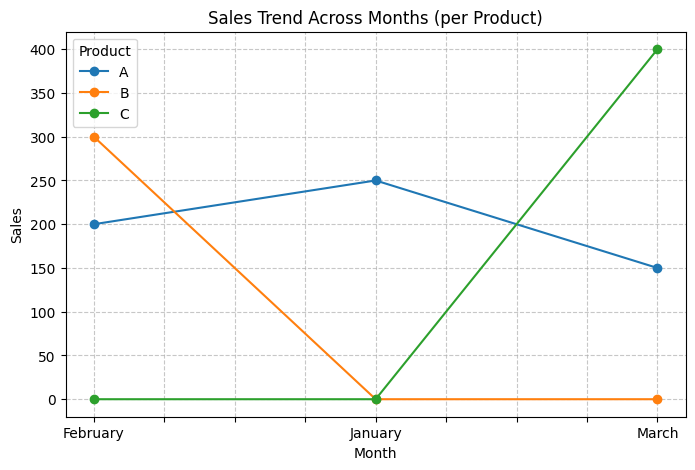

In [3]:
import pandas as pd
sales_data = pd.DataFrame({
    "OrderID": [1, 2, 3, 4, 5],
    "Product": ["A", "B", "A", "C", "A"],
    "Month": ["January", "February", "February", "March", "March"],
    "Sales": [250, 300, 200, 400, 150]
})
feedback_data = pd.DataFrame({
    "OrderID": [1, 2, 6, 7, 8],
    "CustomerID": [101, 102, 103, 104, 105],
    "Month": ["January", "February", "February", "March", "March"],
    "Feedback_Score": [4.5, 4.0, 3.5, 5.0, 4.8]
})
sales_hier = sales_data.set_index(["Product", "Month"])
print("\nHierarchical Index DataFrame:")
print(sales_hier)
print("\nSales for Product A across months:")
print(sales_hier.loc["A"])
inner_merge = pd.merge(sales_data, feedback_data, on="OrderID", how="inner")
left_merge = pd.merge(sales_data, feedback_data, on="OrderID", how="left")
outer_merge = pd.merge(sales_data, feedback_data, on="OrderID", how="outer")
print("\nInner Merge (only shared OrderIDs):")
print(inner_merge)
print("\nLeft Merge (all Sales, feedback when available):")
print(left_merge)
print("\nOuter Merge (all OrderIDs from both tables):")
print(outer_merge)

sales_q1 = sales_data.copy()
sales_q2 = pd.DataFrame({
    "OrderID": [9, 10],
    "Product": ["B", "C"],
    "Month": ["April", "May"],
    "Sales": [500, 600]
})

# Vertical (stack rows)
concat_vertical = pd.concat([sales_q1, sales_q2], axis=0)
print("\nVertical Concatenation:")
print(concat_vertical)

# Horizontal (add new columns, must align indices)
extra_info = pd.DataFrame({"Discount": [5, 10, 0, 15, 20]}, index=sales_q1.index)
concat_horizontal = pd.concat([sales_q1, extra_info], axis=1)
print("\nHorizontal Concatenation:")
print(concat_horizontal)

# --------------------------
# 4. Combine with missing Feedback filled
# --------------------------
def combine_and_fill(sales, feedback):
    merged = pd.merge(sales, feedback, on="OrderID", how="outer")
    # Fill Feedback_Score with average if missing
    merged["Feedback_Score"] = merged["Feedback_Score"].fillna(merged["Feedback_Score"].mean())
    return merged

combined = combine_and_fill(sales_data, feedback_data)
print("\nCombined with filled Feedback_Score:")
print(combined)

# --------------------------
# 5. Pivot Table
# --------------------------
pivot_sales = sales_data.pivot_table(
    index="Product", 
    columns="Month", 
    values="Sales", 
    aggfunc="sum",
    fill_value=0
)
print("\nPivot Table (Products vs Months):")
print(pivot_sales)
import matplotlib.pyplot as plt

# --------------------------
# Plot Sales Trends (Pivot)
# --------------------------
# Pivot table from earlier
pivot_sales = sales_data.pivot_table(
    index="Product", 
    columns="Month", 
    values="Sales", 
    aggfunc="sum",
    fill_value=0
)

print("\nPivot Table (Products vs Months):")
print(pivot_sales)

# Bar plot: Sales by Product across Months
pivot_sales.plot(kind="bar", figsize=(8,5))
plt.title("Monthly Sales by Product")
plt.xlabel("Product")
plt.ylabel("Sales")
plt.legend(title="Month")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Line plot: Sales trend across months for each product
pivot_sales.T.plot(kind="line", marker="o", figsize=(8,5))
plt.title("Sales Trend Across Months (per Product)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend(title="Product")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()
